In [1]:
%pylab inline
import numpy as np
from sklearn.cross_validation import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [2]:
# load train and test data
mnist_train = np.loadtxt('../data/train.csv', delimiter=',', dtype=int, skiprows=1)
#mnist_train = np.loadtxt('train_n.csv', delimiter=',', dtype=int, skiprows=1)
mnist_test = np.loadtxt('../data/test.csv', delimiter=',', dtype=int, skiprows=1)

In [3]:
# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(mnist_train[:,1:], mnist_train[:,0])

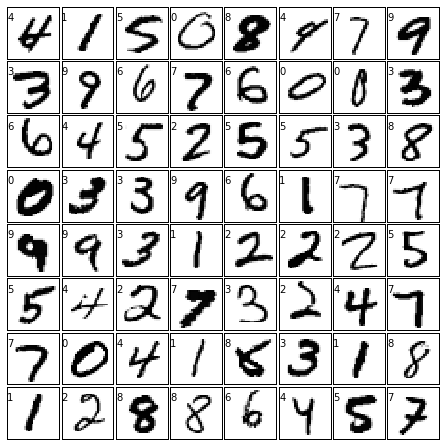

In [5]:
# copied from notebook 02A_representation_of_data.ipynb
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.Greys, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(y_train[i]))

In [6]:
# parameters
n_components = 3
n_classes = 3
n_estimators = 30
n_jobs = 3
pairs = [[0, 1], [0, 2], [1, 2]]

In [44]:
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(n_components=n_components)
proj_train = pca.fit_transform(X_train)
proj_test = pca.fit_transform(X_test)
#from sklearn.manifold import Isomap
#iso = Isomap(n_components=n_components)
#proj_train = iso.fit_transform(X_train)
#proj_test = iso.fit_transform(X_test)

<matplotlib.colorbar.Colorbar instance at 0x0000000023C29E88>

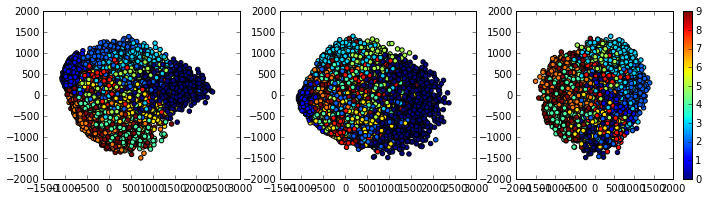

In [45]:
figure(num=1, figsize=(12, 3), dpi=100, facecolor='w', edgecolor='k') # plot results
plot_idx = 1
for pair in pairs:
    plt.subplot(1, len(pairs), plot_idx)
    plt.scatter(proj_train[:, pair[0]], proj_train[:, pair[1]], c=y_train)
    plot_idx += 1
plt.colorbar()

In [8]:
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_iris.html
from sklearn import clone
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier)
from sklearn.externals.six.moves import xrange
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [47]:
# train the models
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators, n_jobs=n_jobs),
          ExtraTreesClassifier(n_estimators=n_estimators, n_jobs=n_jobs),
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=n_estimators),
          GradientBoostingClassifier(n_estimators=n_estimators),
          GaussianNB(),
          #SVC(kernel='rbf'),
          KNeighborsClassifier(n_neighbors=1)]

('DecisionTree with features', [0, 1], 'has a score of', 0.37028571428571427)
('RandomForest with 30 estimators with features', [0, 1], 'has a score of', 0.4076190476190476)
('ExtraTrees with 30 estimators with features', [0, 1], 'has a score of', 0.40095238095238095)
('AdaBoost with 30 estimators with features', [0, 1], 'has a score of', 0.37561904761904763)
('GradientBoosting with 30 estimators with features', [0, 1], 'has a score of', 0.45857142857142857)
('GaussianNB with features', [0, 1], 'has a score of', 0.43685714285714283)
('KNeighbors with features', [0, 1], 'has a score of', 0.37238095238095237)
('DecisionTree with features', [0, 2], 'has a score of', 0.28657142857142859)
('RandomForest with 30 estimators with features', [0, 2], 'has a score of', 0.31685714285714284)
('ExtraTrees with 30 estimators with features', [0, 2], 'has a score of', 0.31447619047619046)
('AdaBoost with 30 estimators with features', [0, 2], 'has a score of', 0.33714285714285713)
('GradientBoosting wit

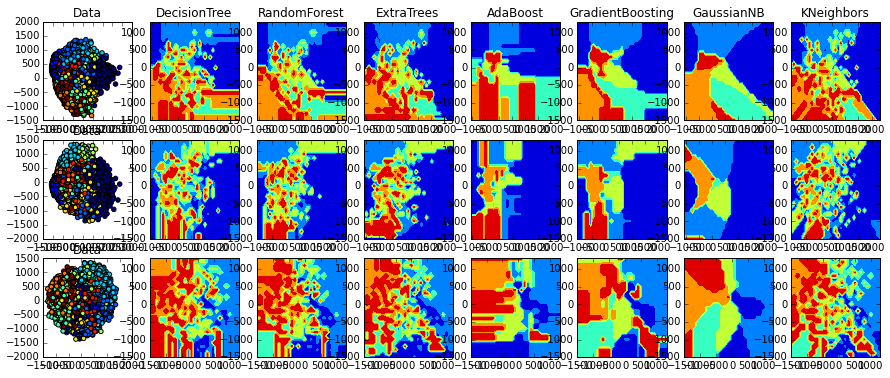

In [48]:
# parameters
plot_step = 100  # fine step width for decision surface contours
RANDOM_SEED = 42  # fix the seed on each iteration
cmap = plt.cm.jet

figure(num=1, figsize=(15, 6), dpi=100, facecolor='w', edgecolor='k') # plot results
plot_idx = 1
for pair in pairs:
    plt.subplot(len(pairs), len(models) + 1, plot_idx)
    plt.title("Data")
    plt.scatter(proj_test[:, pair[0]], proj_test[:, pair[1]], c=y_test)
    plot_idx += 1
    
    for model in models:
        X = proj_train[:, pair]
        y = y_train
        Xt = proj_test[:, pair]
        yt = y_test
        
        # Train
        clf = clone(model)
        clf = model.fit(X, y)

        scores = clf.score(Xt, yt)
        
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(".")[-1][:-2]
        if model_title.endswith('Classifier'):
            model_title = model_title[:-len("Classifier")]
        #print str(type(model)).split(".")[-1][:-2]
        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(len(model.estimators_))
        print( model_details + " with features", pair, "has a score of", scores )

        plt.subplot(len(pairs), len(models) + 1, plot_idx)
        if plot_idx <= len(models) + 1:
            # Add a title at the top of each column
            plt.title(model_title)

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min(), X[:, 0].max()
        y_min, y_max = X[:, 1].min(), X[:, 1].max()
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=cmap)

        plot_idx += 1  # move on to the next plot in sequence

In [9]:
# check best algorithm
clf = ExtraTreesClassifier(n_estimators=n_estimators, n_jobs=n_jobs)
clf.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

In [ ]:
# copied from examples 
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

In [13]:
# accuracy
matches = (predicted == expected)
matches.sum() / float(len(matches))

0.96123809523809522

In [ ]:
# f1 score
from sklearn import metrics
print metrics.classification_report(expected, predicted)

In [ ]:
# confusion matrix
print metrics.confusion_matrix(expected, predicted)

In [ ]:
# check best algorithm
#clf = RandomForestClassifier(n_estimators=n_estimators*10)
#clf = KNeighborsClassifier(n_neighbors=1)
#clf.fit(mnist_train[:,1:], mnist_train[:,0])

# use the model to predict the labels of the test data
#predicted = clf.predict(mnist_test)

In [ ]:
#with open("predicted.txt", 'w') as f:
#    f.write('ImageId,Label\n')
#    for i in range(len(predicted)):
#        f.write(str(i + 1) + ',' + str(predicted[i]) + '\n')

In [ ]:
from skimage.transform import rotate
image = X_test[28,:].reshape(28, 28)
plt.imshow(image)

In [ ]:
max_rot = 45
num_rot = 64
angles = np.linspace(-max_rot, max_rot, num_rot)

In [ ]:
X_rot = np.empty((0,784), int)
for angle in angles:
    X_rot = numpy.vstack([X_rot, rotate(image, angle, preserve_range=True).reshape(784)])

In [ ]:
pred = clf.predict(X_rot)
prob = clf.predict_proba(X_rot)
max_prob = numpy.unravel_index(prob.argmax(), prob.shape)
print max_prob
print pred[max_prob[0]]
print prob[max_prob]

In [ ]:
# copied from notebook 02A_representation_of_data.ipynb
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_rot[i].reshape(28, 28), cmap=plt.cm.Greys, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(pred[i]))
    ax.text(0, 25, "%1.3f" % max(prob[i,:]))

In [ ]:
pred_rot = []
for X in X_test:
    image = X.reshape(28, 28)
    X_rot = np.empty((0,784), int)
    for angle in angles:
        X_rot = numpy.vstack([X_rot, rotate(image, angle, preserve_range=True).reshape(784)])
    prob = clf.predict_proba(X_rot)
    max_prob = numpy.unravel_index(prob.argmax(), prob.shape)
    pred_rot.append(max_prob[1])

In [ ]:
# accuracy
matches = (pred_rot == expected)
matches.sum() / float(len(matches))

In [10]:
# use the model to predict the labels of the test data
predicted_proba = clf.predict_proba(X_test)

In [11]:
max_prob = predicted_proba.max(axis=1)
s = sorted(range(len(max_prob)), key=lambda k: max_prob[k])

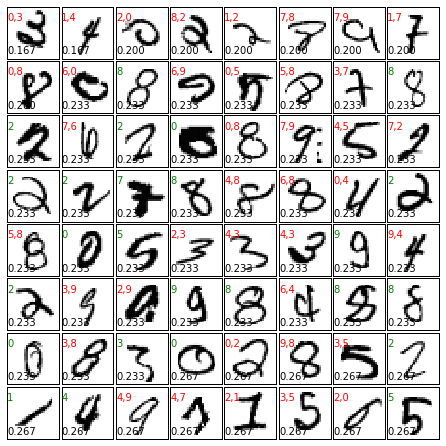

In [12]:
# copied from examples 
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[s[i]].reshape(28, 28), cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    if predicted[s[i]] == expected[s[i]]:
        ax.text(0, 7, str(predicted[s[i]]), color='green')
        ax.text(0, 25, "%1.3f" % max(predicted_proba[s[i],:]))
    else:
        ax.text(0, 7, str(predicted[s[i]]) + "," + str(expected[s[i]]), color='red')
        ax.text(0, 25, "%1.3f" % max(predicted_proba[s[i],:]))